In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette()

# $H_2$


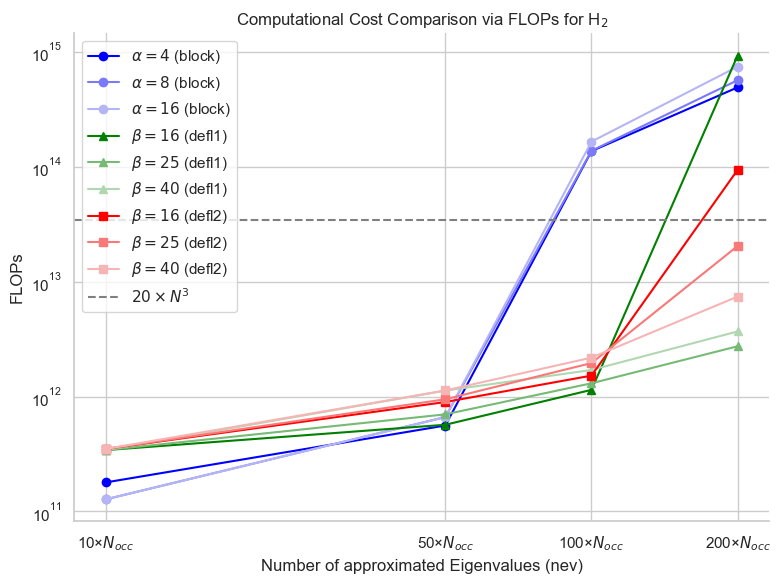

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
N_occ =1
N = np.array([10, 50, 100, 200])

# block davidson
FLOPS_16 = np.array([179213353460, 559665999700, 136669627038200, 489683441833200])
FLOPS_25 = np.array([127689696180, 662860224900, 137527449849000, 565044490819600])
FLOPS_40 = np.array([127689696180, 662860224900, 165188018613800, 742031089239600])


# deflation algorithm (sorting of Eigenvalues)
FLOPS_16_def = np.array([342211375416, 568173067348, 1143580058914, 926976472646686])
FLOPS_25_def = np.array([342211375416, 700038639548, 1304401939782, 2738683449200])
FLOPS_40_def = np.array([342211375416, 1126472236804, 1702282147472, 3686170035402])

# deflation algorithm (keep running until convergence)
FLOPS_16_def1 = np.array([350655912760, 895997128488, 1520739847862, 93736255643800])
FLOPS_25_def1 = np.array([350655912760, 946787529752, 1955403718740, 20404958525795])
FLOPS_40_def1 = np.array([350655912760, 1129212037300, 2180921001662, 7409273765454])

# Exact diagonalization flops
Grenze = 20*(11994)**3

# Generate color shades for each method
blue_shades = sns.light_palette("blue", n_colors=5, reverse=True)
green_shades = sns.light_palette("green", n_colors=5, reverse=True)
red_shades = sns.light_palette("red", n_colors=5, reverse=True)

plt.figure(figsize=(8,6))

# Standard Davidson (circles)
plt.plot(N, FLOPS_16, label=r'$\alpha = 4$ (block)', marker='o', color=blue_shades[0])
plt.plot(N, FLOPS_25, label=r'$\alpha = 8$ (block)', marker='o', color=blue_shades[2])
plt.plot(N, FLOPS_40, label=r'$\alpha = 16$ (block)', marker='o', color=blue_shades[3])

# Deflation with ordering(triangles)
plt.plot(N, FLOPS_16_def, label=r'$\beta = 16$ (defl1)', marker='^', color=green_shades[0])
plt.plot(N, FLOPS_25_def, label=r'$\beta = 25$ (defl1)', marker='^', color=green_shades[2])
plt.plot(N, FLOPS_40_def, label=r'$\beta = 40$ (defl1)', marker='^', color=green_shades[3])

# Deflation until convergence (squares)
plt.plot(N, FLOPS_16_def1, label=r'$\beta = 16$ (defl2)', marker='s', color=red_shades[0])
plt.plot(N, FLOPS_25_def1, label=r'$\beta = 25$ (defl2)', marker='s', color=red_shades[2])
plt.plot(N, FLOPS_40_def1, label=r'$\beta = 40$ (defl2)', marker='s', color=red_shades[3])

# Reference line
plt.axhline(Grenze, color='gray', linestyle='--', label=r'$20 \times N^3$')

plt.title(r'Computational Cost Comparison via FLOPs for H$_{2}$')
plt.xscale('log')
plt.yscale('log')

xticks = np.array([10, 50, 100, 200]) * N_occ
# Create labels: one line for nev, second line for multiplier
xtick_labels = [f"{mult}×$N_{{occ}}$" for nev, mult in zip(xticks, [10, 50, 100, 200])]
plt.xticks(xticks, xtick_labels)
plt.xlabel('Number of approximated Eigenvalues (nev)')
plt.ylabel('FLOPs')
plt.legend()
sns.despine()
plt.tight_layout()
plt.savefig('flops_comparison_H2.png', dpi=300)
plt.show()

# $CH_2O$

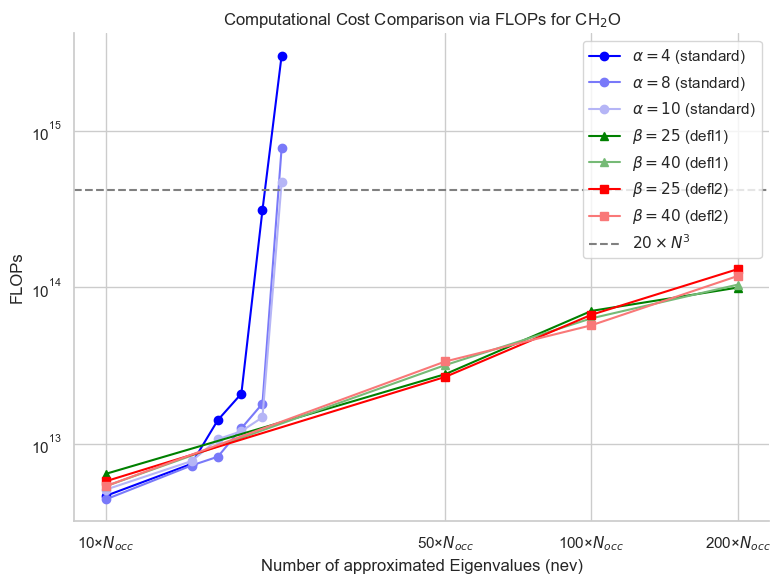

In [8]:
N = np.array([10, 50, 100, 200]) *6
N_occ =6
N_block = np.array([10, 15, 17, 19, 21, 23]) *6

# Block Davidson (circles)
FLOPS_4 = np.array([4640589149100, 7421795065530, 14166167468682, 20869785341010, 311908520004600, 3041267507394030])
FLOPS_8 = np.array([4405801238340, 7247024095410, 8251693168158, 12535766414262, 18027893195046, 779828189847582])
FLOPS_10 = np.array([5082833501100, 7732455154650, 10671336177942, 12007060296594, 14738465704914, 470107469051082])


# Deflation with ordering(triangles)
FLOPS_25_def = np.array([6415065628956, 27845261539523, 70674758645938, 99597905113222])
FLOPS_40_def = np.array([5349292935528, 31816496438039,63363168555916, 104014172291569])

# Deflation until convergence (squares)
FLOPS_25_def1 = np.array([5751718005519, 26744518761011, 66777753371722, 130693032030320])
FLOPS_40_def1 = np.array([5349292935528, 33555518567601, 57195133086388, 118109819702851])

Grenze = 20*(27643)**3

plt.figure(figsize=(8,6))
# Standard Davidson (circles)
plt.plot(N_block, FLOPS_4, label=r'$\alpha = 4$ (standard)', marker='o', color=blue_shades[0])
plt.plot(N_block, FLOPS_8, label=r'$\alpha = 8$ (standard)', marker='o', color=blue_shades[2])
plt.plot(N_block, FLOPS_10, label=r'$\alpha = 10$ (standard)', marker='o', color=blue_shades[3])

# Deflation (triangles)
# plt.plot(N, FLOPS_16_def, label=r'$\alpha = 16$ (defl1)', marker='^', color=green_shades[0])
plt.plot(N, FLOPS_25_def, label=r'$\beta = 25$ (defl1)', marker='^', color=green_shades[0])
plt.plot(N, FLOPS_40_def, label=r'$\beta = 40$ (defl1)', marker='^', color=green_shades[2])

# Deflation until convergence (squares)
# plt.plot(N, FLOPS_16_def1, label=r'$\alpha = 16$ (defl2)', marker='s', color=red_shades[0])
plt.plot(N, FLOPS_25_def1, label=r'$\beta = 25 $ (defl2)', marker='s', color=red_shades[0])
plt.plot(N, FLOPS_40_def1, label=r'$\beta = 40$ (defl2)', marker='s', color=red_shades[2])
# Reference line
plt.axhline(Grenze, color='gray', linestyle='--', label=r'$20 \times N^3$')

plt.title(r'Computational Cost Comparison via FLOPs for CH$_{2}$O')
plt.xscale('log')
plt.yscale('log')

xticks = np.array([10, 50, 100, 200]) * N_occ
# Create labels: one line for nev, second line for multiplier
xtick_labels = [f"{mult}×$N_{{occ}}$" for nev, mult in zip(xticks, [10, 50, 100, 200])]
plt.xticks(xticks, xtick_labels)
plt.xlabel('Number of approximated Eigenvalues (nev)')
plt.ylabel('FLOPs')
plt.legend()
sns.despine()
plt.tight_layout()
plt.savefig('flops_comparison_CH2O_block.png', dpi=300)
plt.show()

# Uracil


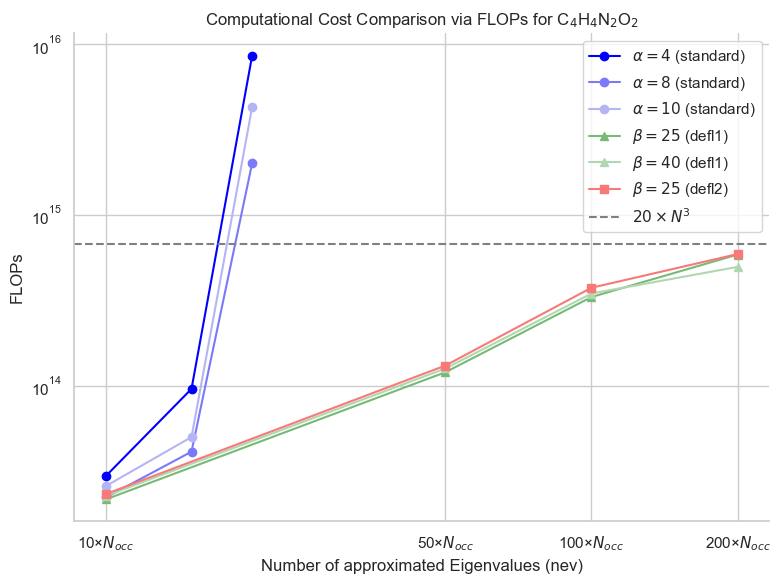

In [7]:
N_occ = 21
N_virt = 32416
N_block = np.array([10, 15, 20]) * N_occ
N = np.array([10, 50, 100, 200]) * N_occ

# Block Davidson
FLOPS_4 = np.array([29775748175040,  96207503003640, 8614283542865280])
FLOPS_8 = np.array([22282635345600, 41232042450900, 2019798514366080])
FLOPS_10 = np.array([25965835993440, 50228889949980, 4306973843598720])

# Deflation 1
FLOPS_25_def1 = np.array([21704563957828, 120351328951380, 331796334339744, 588466468666572])
FLOPS_40_def1 = np.array([22727538148004, 126629076279900, 347962601472256, 498235645111392])


# Deflation 2
FLOPS_25_def2 = np.array([23316532572932, 131675824490268, 376035933025380, 592323934760288])

Grenze = 20*(N_virt)**3

plt.figure(figsize=(8,6))
# Standard Davidson (circles)
plt.plot(N_block, FLOPS_4, label=r'$\alpha = 4$ (standard)', marker='o', color=blue_shades[0])
plt.plot(N_block, FLOPS_8, label=r'$\alpha = 8$ (standard)', marker='o', color=blue_shades[2])
plt.plot(N_block, FLOPS_10, label=r'$\alpha = 10$ (standard)', marker='o', color=blue_shades[3])
# Deflation (triangles)
plt.plot(N, FLOPS_25_def1, label=r'$\beta = 25$ (defl1)', marker='^', color=green_shades[2])
plt.plot(N, FLOPS_40_def1, label=r'$\beta = 40$ (defl1)', marker='^', color=green_shades[3])
# # Deflation until convergence (squares)
plt.plot(N, FLOPS_25_def2, label=r'$\beta = 25$ (defl2)', marker='s', color=red_shades[2])
# plt.plot(N, FLOPS_40_def2, label=r'$\beta = 40$ (defl2)', marker='s', color=red_shades[3])  
# Reference line
plt.axhline(Grenze, color='gray', linestyle='--', label=r'$20 \times N^3$')

plt.title(r'Computational Cost Comparison via FLOPs for C$_{4}$H$_{4}$N$_{2}$O$_{2}$')
plt.xscale('log')
plt.yscale('log')

xticks = np.array([10, 50, 100, 200]) * N_occ
# Create labels: one line for nev, second line for multiplier
xtick_labels = [f"{mult}×$N_{{occ}}$" for nev, mult in zip(xticks, [10, 50, 100, 200])]

# Apply xticks and labels
plt.xticks(xticks, xtick_labels)
plt.xlabel('Number of approximated Eigenvalues (nev)')
plt.ylabel('FLOPs')
plt.legend()
sns.despine()
plt.tight_layout()
plt.savefig('flops_comparison_C6H6_block.pdf')
plt.show()

# He


In [ ]:
N = 4488

# Block davidson
FLOP_block_4 = [32635914360, 18348622320, 81651134160, 295568823600, 9812054540000, 88466893358400]
FLOP_block_8 = [18946530880, 25517796880, 100240992720, 199578861200, 2387004623200, 30424329067200]
FLOP_block_10 = [21849206040, 28206299280, 90571713840, 254752196400, 1560659362400, 20602975595200]

# Deflation algorithm 1
FLOP_32 = [36205523764, 61265336596, 165452878388, 199983808664, 2791679488344, 38212545367456]
FLOP_64 = [36205523764, 61265336596, 218528775724, 260816095260, 514857409076, 35849559646920]
# Deflation algorithm 2
FLOP_32_2 = [51014576504, 61265336596, 165452878388, 229997588896, 2588422407144, 38212545367456]
FLOP_64_2 = [51014576504, 61265336596, 218528775724, 379990841896, 569898959348, 31394588068056]

# Bound of exact diagonalization
Grenze = 20 * (N**3)

nev = [5, 10, 30, 50, 100, 200]

plt.figure(figsize=(8,6))
# Block Davidson (circles)
plt.plot(nev, FLOP_block_4, label=r'$\alpha = 4$ (block)', marker='o', color=green_shades[0])
plt.plot(nev, FLOP_block_8, label=r'$\alpha = 8$ (block)', marker='o', color=green_shades[2])
plt.plot(nev, FLOP_block_10, label=r'$\alpha = 10$ (block)', marker='o', color=green_shades[3])
plt.plot(nev, FLOP_32, label=r'$\beta = 32$ (defl1)', marker='o', color=blue_shades[0])
plt.plot(nev, FLOP_64, label=r'$\beta = 64$ (defl1)', marker='o', color=blue_shades[2])
plt.plot(nev, FLOP_32_2, label=r'$\beta = 32$ (defl2)', marker='s', color=red_shades[0])
plt.plot(nev, FLOP_64_2, label=r'$\beta = 64$ (defl2)', marker='s', color=red_shades[2])
plt.axhline(Grenze, color='gray', linestyle='--', label=r'$20 \times N^3$')
plt.title('Computational Cost Comparison via FLOPs for He (N=4488)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of approximated Eigenvalues (nev)')
plt.ylabel('FLOPs')
plt.legend()
sns.despine()
plt.tight_layout()


# hBN


In [ ]:
N = 6863
N_occ = 36

FLOP_4 = [1315830248460, 34420102587720, 16046163737328, 11293129091928]
FLOP_8 = [1658964018060, 5105652727320, 16046163737328, 11293129091928]
FLOP_10 = [1878216975540, 6819951039480, 16046163737328, 11293129091928]

FLOP_25 = [1687983686837, 3635574955184]


N_tot = np.array([5, 10, 50, 100]) * N_occ

plt.figure(figsize=(8,6))
# Block Davidson (circles)
plt.plot(N_tot, FLOP_4, label=r'$\alpha = 4$ (block)', marker='o', color=green_shades[0])
plt.plot(N_tot, FLOP_8, label=r'$\alpha = 8$ (block)', marker='o', color=green_shades[2])
plt.plot(N_tot, FLOP_10, label=r'$\alpha = 10$ (block)', marker='o', color=green_shades[3]) 
plt.axhline(Grenze, color='gray', linestyle='--', label=r'$20 \times N^3$')
plt.title('Computational Cost Comparison via FLOPs for hBN (N=6863)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of approximated Eigenvalues (nev)')
plt.ylabel('FLOPs')
plt.legend()
sns.despine()
plt.tight_layout()




# Si


In [ ]:
N = 6201
N_occ = 72

FLOP_4 = np.array([4596140364840, 13267937226960, 18287080201440, 8888499627624, 12039017994504])
FLOP_8 = np.array([3247845417000, 9770896388880, 15909830643384, 8888499627624, 12039017994504])
FLOP_10 = np.array([4373200209240, 9770896388880, 15909830643384, 8888499627624, 12039017994504])

nev = np.array([5, 10, 20, 50, 70]) * N_occ

plt.figure(figsize=(8,6))
# Block Davidson (circles)
plt.plot(nev, FLOP_4, label=r'$\alpha = 4$ (block)', marker='o', color=green_shades[0])
plt.plot(nev, FLOP_8, label=r'$\alpha = 8$ (block)', marker='o', color=green_shades[2])
plt.plot(nev, FLOP_10, label=r'$\alpha = 10$ (block)', marker='o', color=green_shades[3])
plt.axhline(Grenze, color='gray', linestyle='--', label=r'$20 \times N^3$')
plt.title('Computational Cost Comparison via FLOPs for Si (N=6201)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of approximated Eigenvalues (nev)')
plt.ylabel('FLOPs')
plt.legend()
sns.despine()
plt.tight_layout()
plt.savefig('flops_comparison_Si.png', dpi=300)

